In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from datasets import load_dataset, concatenate_datasets
from scipy.spatial.distance import pdist,cdist, squareform
from sentence_transformers import SentenceTransformer
import pickle
import random

SEED = 5
random.seed(SEED)
np.random.seed(SEED)

# Load the BBC News dataset (using Huggingface version)
dataset = load_dataset("SetFit/bbc-news")  # has 2,225 articles with the 5 labels. 
full_dataset = concatenate_datasets([dataset["train"], dataset["test"]])
texts = full_dataset["text"]
labels = full_dataset["label"]

"""
# Load a RoBERTa-based SentenceTransformer
model = SentenceTransformer("all-roberta-large-v1")

# Encode texts (returns numpy array)
embeddings = model.encode(texts, batch_size=32, show_progress_bar=True)

# Pickle for easy access
with open("bbc_embeddings2225.pkl", "wb") as f:
    pickle.dump(embeddings, f)

with open("data/bbc_labele.pkl", "wb") as f:
    pickle.dump(labels, f)
"""

/Users/noahbergam/Desktop/tsne-exaggerates-clusters/env/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'\n# Load a RoBERTa-based SentenceTransformer\nmodel = SentenceTransformer("all-roberta-large-v1")\n\n# Encode texts (returns numpy array)\nembeddings = model.encode(texts, batch_size=32, show_progress_bar=True)\n\n# Pickle for easy access\nwith open("bbc_embeddings2225.pkl", "wb") as f:\n    pickle.dump(embeddings, f)\n\nwith open("data/bbc_labele.pkl", "wb") as f:\n    pickle.dump(labels, f)\n'

In [3]:
with open("data/bbc_embeddings2225.pkl", "rb") as f:
    embeddings = pickle.load(f)
with open("data/bbc_labels.pkl", "rb") as f:
    labels = pickle.load(f)

In [4]:
X = embeddings
labels = np.array(labels)

In [5]:
# caclulates the diameter of a set of points
def diam(pts):
    return max(pdist(pts, metric='euclidean'))


diam(X)

1.5465169951658135

In [6]:
tsne = TSNE(n_components=2)
pca = PCA(n_components=2)

X_tsne = tsne.fit_transform(X)
X_pca = pca.fit_transform(X)

/Users/noahbergam/Desktop/tsne-exaggerates-clusters/env/lib/python3.8/site-packages/threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


In [7]:
X_poison = X.copy()
#labels_poison = labels_.copy()

from sklearn.cluster import KMeans



m = 220

for i in range(m):
    idx = np.random.choice(500, size=5, replace=False)
    mu = np.mean(X_poison[idx], axis=0)

    X_poison = np.concatenate((X_poison,[ mu  ]), axis=0)



X_tsne_poisoned = tsne.fit_transform(X_poison)

#X_pca_poisoned = pca.fit_transform(X_poison)





In [8]:
X_big_outliers = X.copy()
#labels_poison = labels_.copy()

from sklearn.cluster import KMeans
from tqdm import tqdm

# caclulates the diameter of a set of points
def diam(pts):
    return max(pdist(pts, metric='euclidean'))

m_big_outliers = 1100
"""
for i in tqdm(range(m_big_outliers)):
    outlier = np.random.normal(size=(X_big_outliers.shape[1])) 
    outlier /= np.linalg.norm(outlier)
    outlier *= 10*diam(X) + np.mean(X, axis=0)
    X_big_outliers = """
    
X_big_outliers = np.concatenate((X_big_outliers, np.array( np.random.normal(size=(m_big_outliers, X_big_outliers.shape[1]))  )), axis=0)



X_tsne_big_outliers = tsne.fit_transform(X_big_outliers)

#X_pca_big_outliers = pca.fit_transform(X_big_outliers)


In [9]:
X_big_outliers = X.copy()
#labels_poison = labels_.copy()

from sklearn.cluster import KMeans
from tqdm import tqdm

# caclulates the diameter of a set of points
def diam(pts):
    return max(pdist(pts, metric='euclidean'))

m_big_outliers = 1100

X_big_outliers = np.concatenate((X_big_outliers, np.array( np.random.normal(size=(m_big_outliers, X_big_outliers.shape[1]))  )), axis=0)


X_tsne_big_outliers = tsne.fit_transform(X_big_outliers)

#X_pca_big_outliers = pca.fit_transform(X_big_outliers)


In [10]:
X_tsne_big_outliers.shape

(3325, 2)

In [11]:
from sklearn.metrics import silhouette_score

SIL_orig = silhouette_score(X, labels)
SIL_tsne = silhouette_score(X_tsne, labels)
SIL_poisoned = silhouette_score(X_tsne_poisoned[:-m], labels)
SIL_outliers = silhouette_score(X_tsne_big_outliers[:-m_big_outliers], labels)

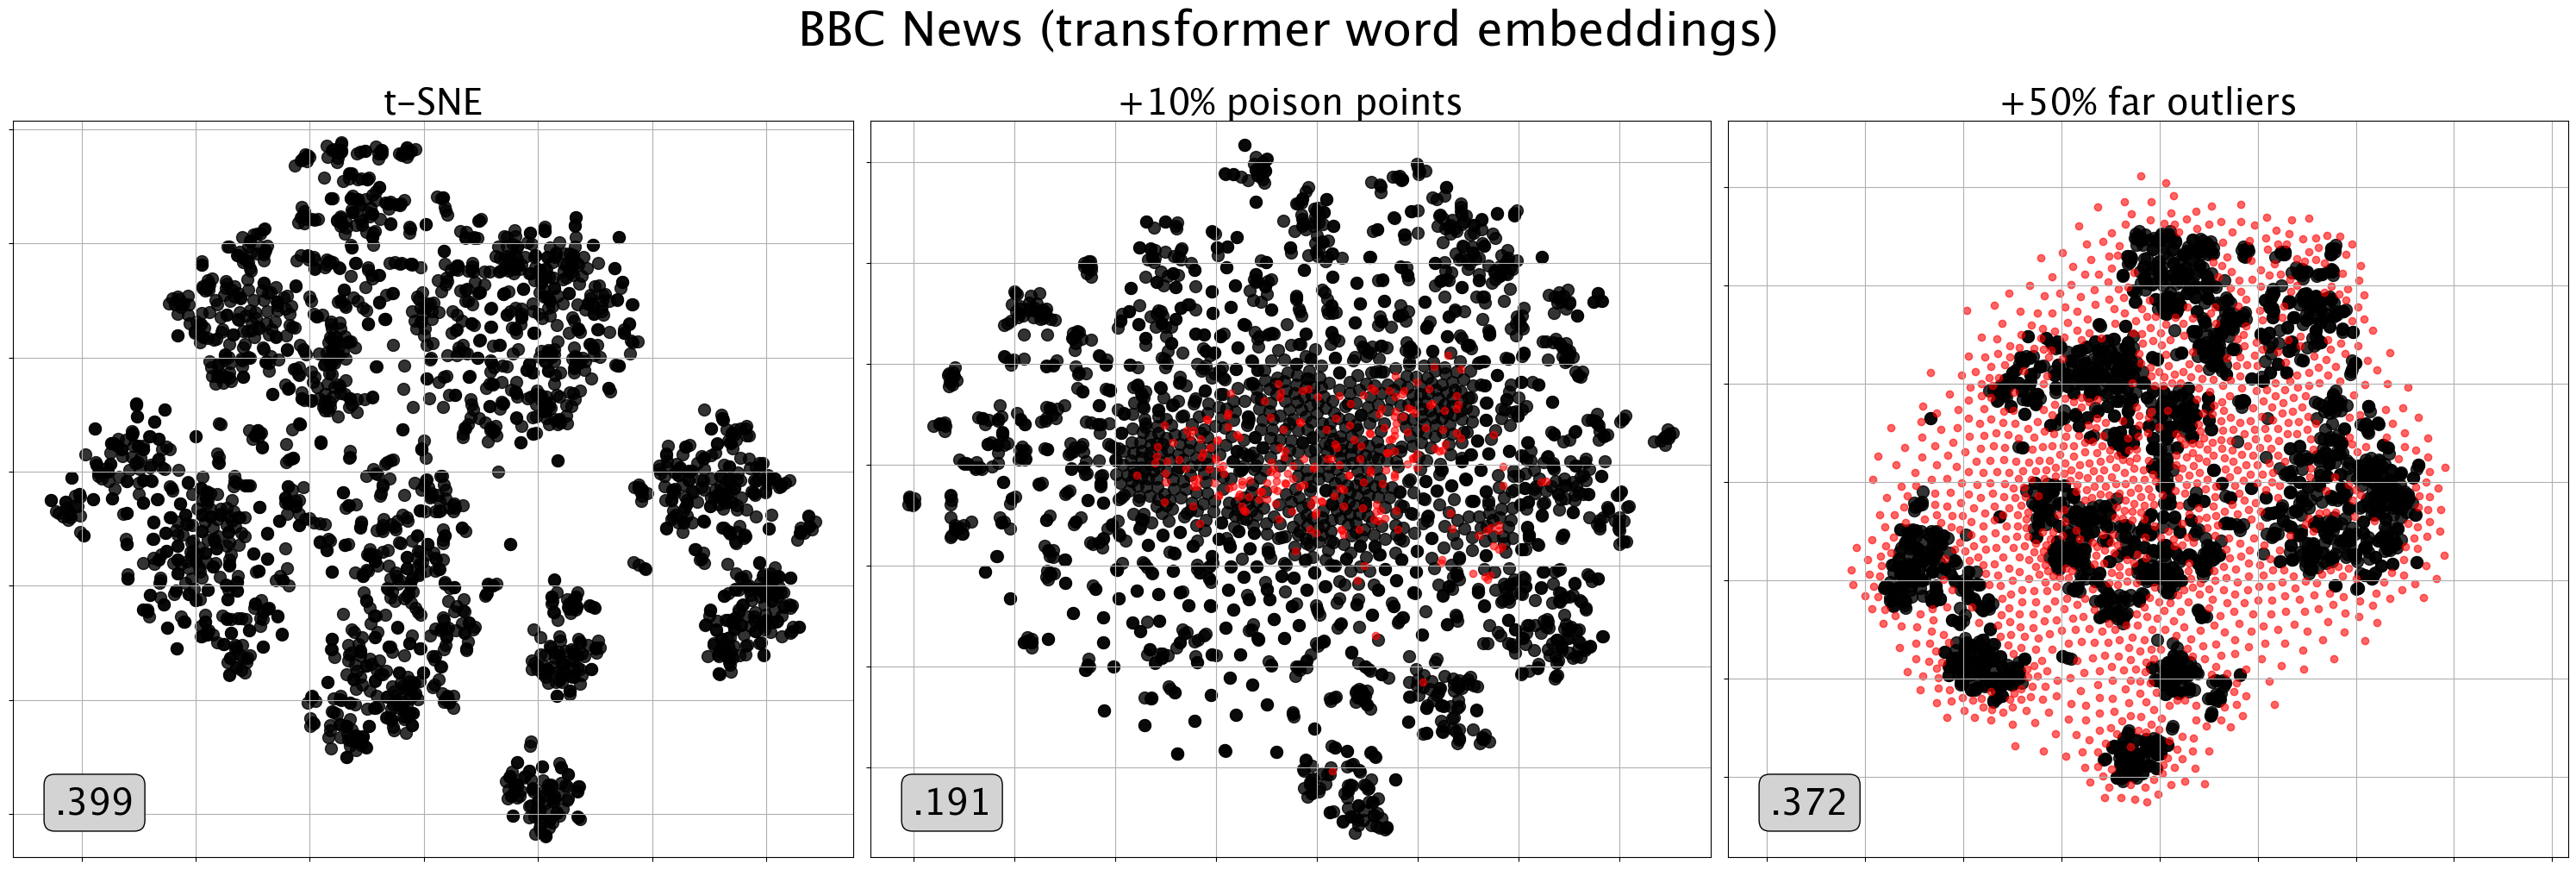

In [12]:
fig, axs = plt.subplots(1,3, figsize=(30,10))

for i in range(3):
    axs[i].grid('on')
    axs[i].axis('equal')
    axs[i].set_xticklabels([])
    axs[i].set_yticklabels([])

axs[0].set_title('t-SNE', fontsize=30)
axs[0].scatter(X_tsne[:,0], X_tsne[:,1], c='black', s=100, alpha=0.8)
axs[0].text(0.05, 0.05, f"{SIL_tsne:.3f}".lstrip("0"),transform=axs[0].transAxes, 
              bbox=dict(facecolor="lightgrey", edgecolor="black", boxstyle="round,pad=0.3"),
              fontsize=30, ha="left", va="bottom")

axs[1].set_title('+10% poison points', fontsize=30)
axs[1].scatter(X_tsne_poisoned[:-m,0], X_tsne_poisoned[:-m,1], c='black', s=100, alpha=0.8)
axs[1].scatter(X_tsne_poisoned[-m:,0], X_tsne_poisoned[-m:,1], c='red', alpha=0.6)
axs[1].text(0.05, 0.05, f"{SIL_poisoned:.3f}".lstrip("0"),transform=axs[1].transAxes, 
              bbox=dict(facecolor="lightgrey", edgecolor="black", boxstyle="round,pad=0.3"),
              fontsize=30, ha="left", va="bottom")

axs[2].set_title('+50% far outliers', fontsize=30)
axs[2].scatter(X_tsne_big_outliers[:-m_big_outliers,0], X_tsne_big_outliers[:-m_big_outliers,1], s=100, c='black', alpha=0.8)
axs[2].scatter(X_tsne_big_outliers[-m_big_outliers:,0], X_tsne_big_outliers[-m_big_outliers:,1], c='red', alpha=0.6)
axs[2].text(0.05, 0.05, f"{SIL_outliers:.3f}".lstrip("0"),transform=axs[2].transAxes, 
              bbox=dict(facecolor="lightgrey", edgecolor="black", boxstyle="round,pad=0.3"),
              fontsize=30, ha="left", va="bottom")
plt.suptitle('BBC News (transformer word embeddings)', fontsize=40, y=1.005)

plt.tight_layout()
plt.savefig('visuals/5_outlier+poison_bbc/BBC_POISON_.png', bbox_inches='tight')

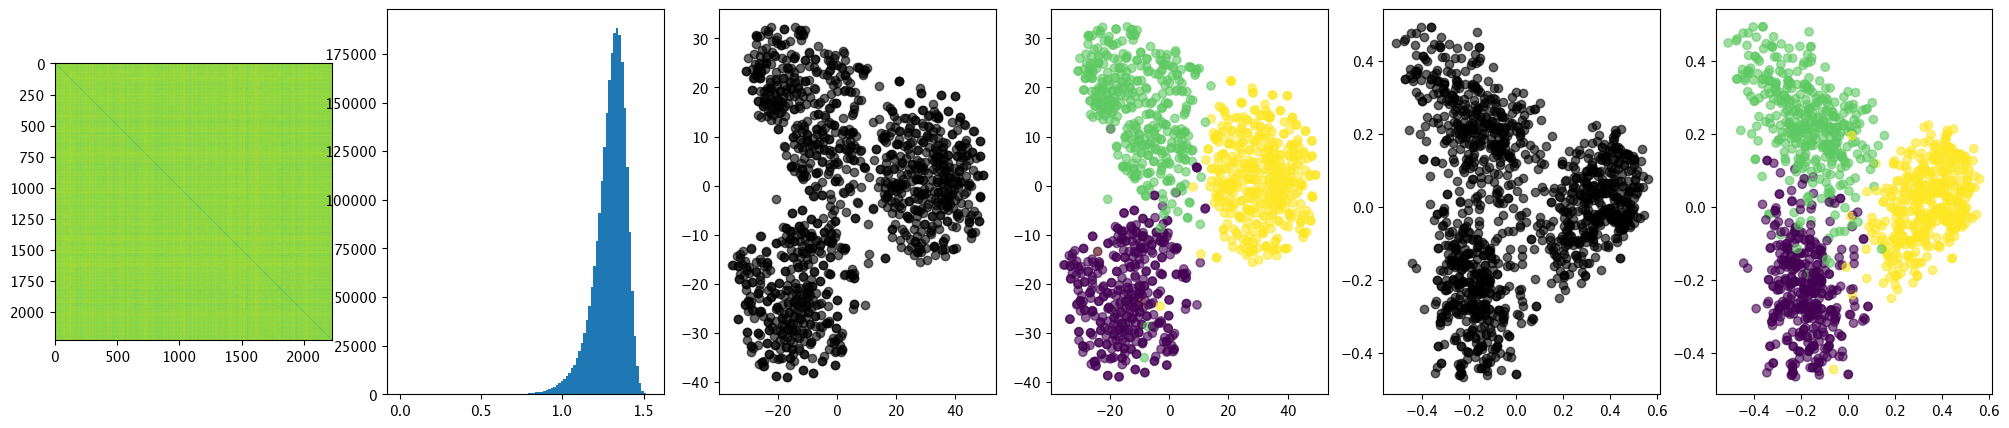

In [13]:
from sklearn.decomposition import PCA

labels =np.array(labels)
ixs = np.where( (labels == 0) | (labels == 3) | (labels == 4) )
X_ = embeddings[ixs]
labels_ = labels[ixs]


tsne = TSNE(n_components=2, random_state=42, perplexity=70, n_iter=1000)
X_tsne_ = tsne.fit_transform(X_)#[new_ixs])

pca = PCA(n_components=2, random_state=42)
X_pca_ = pca.fit_transform(X_)

fig, axs = plt.subplots(1,6, figsize=(25,5))
distlist = pdist(embeddings)
axs[0].imshow(squareform(distlist))
axs[1].hist(distlist, bins=100)
axs[2].scatter(X_tsne_[:,0], X_tsne_[:,1], c='black', alpha=0.6)
axs[3].scatter(X_tsne_[:,0], X_tsne_[:,1], c=labels_, alpha=0.6)
axs[4].scatter(X_pca_[:,0], X_pca_[:,1], c='black', alpha=0.6)
axs[5].scatter(X_pca_[:,0], X_pca_[:,1], c=labels_, alpha=0.6)

In [14]:
X_.shape

(1204, 1024)

In [15]:
X_poison_ = X_.copy()
#labels_poison = labels_.copy()

from sklearn.cluster import KMeans



m = 120

for i in range(m):
    idx = np.random.choice(500, size=5, replace=False)
    mu = np.mean(X_poison_[idx], axis=0)

    X_poison_ = np.concatenate((X_poison_,[ mu  ]), axis=0)



X_tsne_poisoned_ = tsne.fit_transform(X_poison_)
X_pca_poisoned_ = pca.fit_transform(X_poison_)





In [16]:
X_big_outliers_ = X_.copy()
#labels_poison = labels_.copy()

from sklearn.cluster import KMeans
from tqdm import tqdm

# caclulates the diameter of a set of points
def diam(pts):
    return max(pdist(pts, metric='euclidean'))

m_big_outliers = 120

X_big_outliers_ = np.concatenate((X_big_outliers_, np.array( np.random.normal(size=(m_big_outliers, X_big_outliers_.shape[1]))  )), axis=0)



X_tsne_big_outliers_ = tsne.fit_transform(X_big_outliers_)
X_pca_big_outliers_ = pca.fit_transform(X_big_outliers_)


In [17]:
from sklearn.metrics import silhouette_score
### silhouette score of t-sne
print('silhouette score, real', silhouette_score(X_, labels_))

print('silhouette score, tsne', silhouette_score(X_tsne_, labels_))
print('silhouette score, pca', silhouette_score(X_pca_, labels_))
SIL_TSNE_ = silhouette_score(X_tsne_, labels_)
SIL_PCA_ = silhouette_score(X_pca_, labels_)
print('\n')

print('silhouette score, tsne poisoned', silhouette_score(X_tsne_poisoned_[:-m], labels_))
print('silhouette score, pca poisoned', silhouette_score(X_pca_poisoned_[:-m], labels_))
SIL_TSNE_POISONED_ = silhouette_score(X_tsne_poisoned_[:-m], labels_)
SIL_PCA_POISONED_ = silhouette_score(X_pca_poisoned_[:-m], labels_)
print('\n')

print('silhouette score, tsne big outliers', silhouette_score(X_tsne_big_outliers_[:-m_big_outliers], labels_))
print('silhouette score, pca big outliers', silhouette_score(X_pca_big_outliers_[:-m_big_outliers], labels_))
SIL_TSNE_OUTLIERS = silhouette_score(X_tsne_big_outliers_[:-m_big_outliers], labels_)
SIL_PCA_OUTLIERS = silhouette_score(X_pca_big_outliers_[:-m_big_outliers], labels_)

silhouette score, real 0.07897649
silhouette score, tsne 0.548478
silhouette score, pca 0.5558449


silhouette score, tsne poisoned 0.23198932
silhouette score, pca poisoned 0.5563861


silhouette score, tsne big outliers 0.5245569
silhouette score, pca big outliers 0.00927273002414341


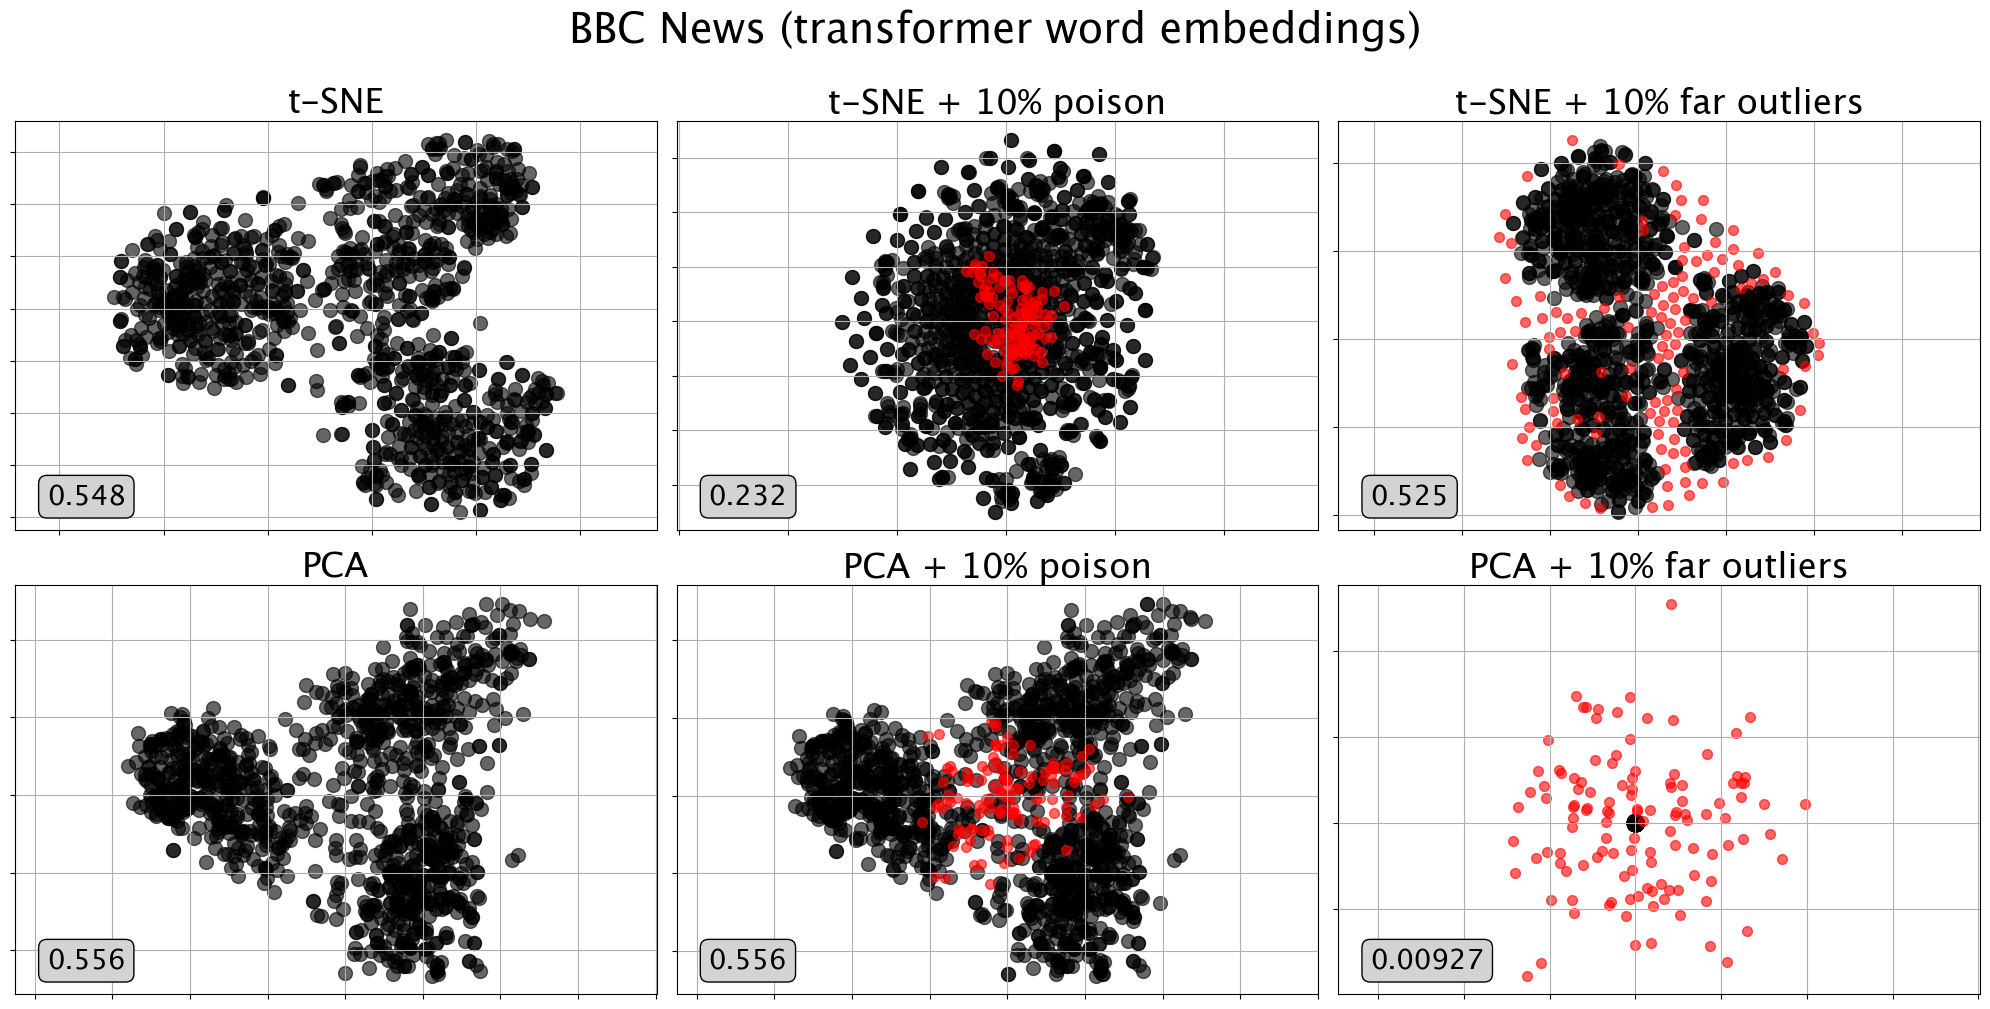

In [18]:
fig, axs = plt.subplots(2,3, figsize=(20,10))

blacksize = 100
redsize = 50

label_fontsize = 20

title_fontsize = 25

for i in range(2):
    for j in range(3):
        axs[i,j].grid('on')
        axs[i,j].axis('equal')
        axs[i,j].set_xticklabels([])
        axs[i,j].set_yticklabels([])


axs[0,0].set_title('t-SNE', fontsize=title_fontsize)
axs[0,0].scatter(-X_tsne_[:-m,0], X_tsne_[:-m,1], c='black', alpha=0.6, s=blacksize)
axs[0,0].text(0.05, 0.05, f"{SIL_TSNE_:.3g}",transform=axs[0,0].transAxes, 
              bbox=dict(facecolor="lightgrey", edgecolor="black", boxstyle="round,pad=0.3"),
              fontsize=label_fontsize, ha="left", va="bottom")

axs[0,1].set_title('t-SNE + 10% poison', fontsize=title_fontsize)
axs[0,1].scatter(-X_tsne_poisoned_[:-m,0], X_tsne_poisoned_[:-m,1], c='black', alpha=0.6, s=blacksize)
axs[0,1].scatter(X_tsne_poisoned_[-m:,0], X_tsne_poisoned_[-m:,1], c='red', alpha=0.6,s=redsize)
axs[0,1].text(0.05, 0.05, f"{SIL_TSNE_POISONED_:.3g}",transform=axs[0,1].transAxes, 
              bbox=dict(facecolor="lightgrey", edgecolor="black", boxstyle="round,pad=0.3"),
              fontsize=label_fontsize, ha="left", va="bottom")

axs[0,2].set_title('t-SNE + 10% far outliers', fontsize=title_fontsize)
axs[0,2].scatter(X_tsne_big_outliers_[:-m_big_outliers,0], X_tsne_big_outliers_[:-m_big_outliers,1], c='black', alpha=0.6, s=blacksize)
axs[0,2].scatter(X_tsne_big_outliers_[-m_big_outliers:,0], X_tsne_big_outliers_[-m_big_outliers:,1], c='red', alpha=0.6, s=redsize)
axs[0,2].text(0.05, 0.05, f"{SIL_TSNE_OUTLIERS:.3g}",transform=axs[0,2].transAxes, 
              bbox=dict(facecolor="lightgrey", edgecolor="black", boxstyle="round,pad=0.3"),
              fontsize=label_fontsize, ha="left", va="bottom")



axs[1,0].set_title('PCA', fontsize=title_fontsize)
axs[1,0].scatter(-X_pca_[:-m,0], X_pca_[:-m,1], c='black', alpha=0.6, s=blacksize)
axs[1,0].text(0.05, 0.05, f"{SIL_PCA_:.3g}",transform=axs[1,0].transAxes, 
              bbox=dict(facecolor="lightgrey", edgecolor="black", boxstyle="round,pad=0.3"),
              fontsize=label_fontsize, ha="left", va="bottom")

axs[1,1].set_title('PCA + 10% poison', fontsize=title_fontsize)
axs[1,1].scatter(-X_pca_poisoned_[:-m,0], X_pca_poisoned_[:-m,1], c='black', alpha=0.6, s=blacksize)
axs[1,1].scatter(X_pca_poisoned_[-m:,0], X_pca_poisoned_[-m:,1], c='red', alpha=0.6,s=redsize)
axs[1,1].text(0.05, 0.05, f"{SIL_PCA_POISONED_:.3g}",transform=axs[1,1].transAxes, 
              bbox=dict(facecolor="lightgrey", edgecolor="black", boxstyle="round,pad=0.3"),
              fontsize=label_fontsize, ha="left", va="bottom")

axs[1,2].set_title('PCA + 10% far outliers', fontsize=title_fontsize)
axs[1,2].scatter(X_pca_big_outliers_[:-m_big_outliers,0], X_pca_big_outliers_[:-m_big_outliers,1], c='black', alpha=0.6, s=blacksize)
axs[1,2].scatter(X_pca_big_outliers_[-m_big_outliers:,0], X_pca_big_outliers_[-m_big_outliers:,1], c='red', alpha=0.6,s=redsize)
axs[1,2].text(0.05, 0.05, f"{SIL_PCA_OUTLIERS:.3g}",transform=axs[1,2].transAxes, 
              bbox=dict(facecolor="lightgrey", edgecolor="black", boxstyle="round,pad=0.3"),
              fontsize=label_fontsize, ha="left", va="bottom")

plt.suptitle('BBC News (transformer word embeddings)', fontsize=30, y=1.005)
plt.tight_layout()
plt.savefig('visuals/5_outlier+poison_bbc/bbc_appendix.png',  bbox_inches='tight')